# Simulating Stock Prices using Geometric Brownian Motion.

### Required Packages

You can install the needed packages using:

```bash
pip install yfinance pandas numpy matplotlib

In [1]:
import datetime as dt
import pandas as pd
import yfinance as yf

In [2]:
#Setting a start and end date for our data.
end= dt.datetime.now()
start= end-dt.timedelta(days=600)
start,end

(datetime.datetime(2023, 11, 5, 23, 3, 8, 703973),
 datetime.datetime(2025, 6, 27, 23, 3, 8, 703973))

In [3]:
#selecting stock to analyse
stocklist= ['AMD']
stocklist

['AMD']

In [4]:
stock_df= yf.download(stocklist,start,end, group_by='ticker',auto_adjust=True)
stock_df

[*********************100%***********************]  1 of 1 completed


Ticker             AMD                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2023-11-06  112.599998  113.080002  110.220001  111.750000  49270400
2023-11-07  111.860001  114.650002  111.220001  113.449997  50550200
2023-11-08  113.550003  115.320000  112.879997  113.589996  41880600
2023-11-09  114.099998  115.809998  113.059998  113.489998  61146900
2023-11-10  114.349998  119.699997  114.029999  118.589996  75135900
...                ...         ...         ...         ...       ...
2025-06-23  130.470001  133.250000  126.820000  129.580002  65152900
2025-06-24  133.429993  138.789993  132.929993  138.429993  78572000
2025-06-25  140.940002  144.179993  139.460007  143.399994  74607200
2025-06-26  145.970001  146.000000  141.910004  143.679993  58180100
2025-06-27  144.160004  147.750397  141.639008  143.809998  59282428

[411 rows x 5 columns]

In [5]:
# Creating a new DataFrame with just the Close prices
close_prices = pd.DataFrame({ticker: stock_df[ticker]['Close'] for ticker in stocklist})
print(close_prices)

                   AMD
Date                  
2023-11-06  111.750000
2023-11-07  113.449997
2023-11-08  113.589996
2023-11-09  113.489998
2023-11-10  118.589996
...                ...
2025-06-23  129.580002
2025-06-24  138.429993
2025-06-25  143.399994
2025-06-26  143.679993
2025-06-27  143.809998

[411 rows x 1 columns]


In [6]:
#Calculating parameters
import numpy as np
import matplotlib.pyplot as plt
log_returns= np.log(close_prices/close_prices.shift(1)).dropna()
log_returns
mu= log_returns.mean()
sigma= log_returns.std()
mu,sigma

(AMD    0.000615
 dtype: float64,
 AMD    0.031998
 dtype: float64)

In [13]:
#Simulation settings
T = 2                          # years
N = 252 * T                    # trading days
dt = 1 / 252                   # time step
simulations = 100              # number of simulated paths

In [14]:
# Initialization of results DataFrames
S0_amd =close_prices['AMD'][-1]      # current AMD price
S0_amd

C:\Users\julia\AppData\Local\Temp\ipykernel_17208\987571433.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0_amd =close_prices['AMD'][-1]      # current AMD price


np.float64(143.80999755859375)

In [15]:
#Random paths for Brownian motion
np.random.seed(42)  # for reproducibility
Z = np.random.standard_normal((N, simulations))

In [16]:
# Precomputation of drift and diffusion
drift_amd = (mu['AMD'] - 0.5 * sigma['AMD']**2) * dt
diffusion_amd = sigma['AMD'] * np.sqrt(dt) * Z

In [17]:
# Simulation of price paths
price_amd = np.zeros((N, simulations))
price_amd[0] = S0_amd
for t in range(1, N):
    price_amd[t] = price_amd[t-1] * np.exp(drift_amd + diffusion_amd[t])

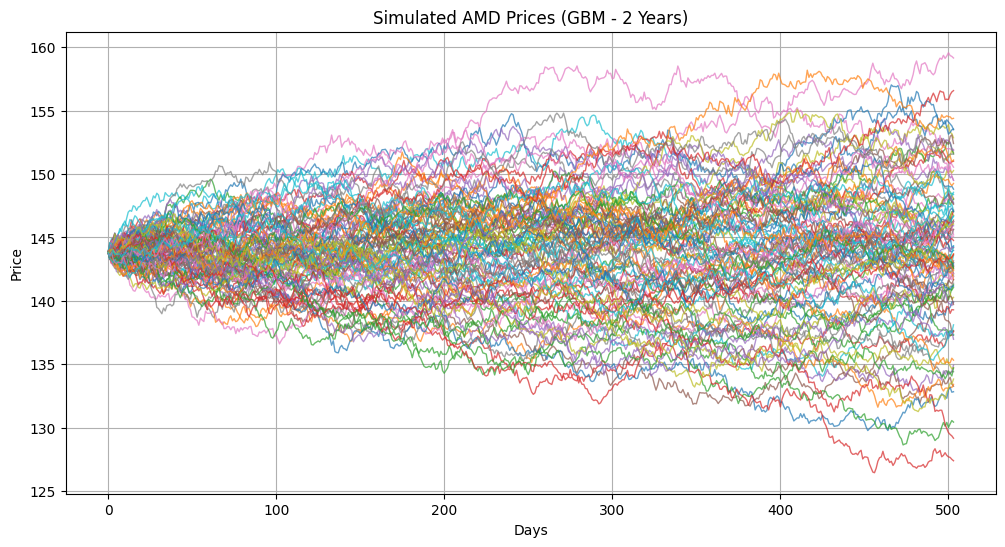

In [18]:
# Plotting the simulations
plt.figure(figsize=(12,6))
plt.plot(price_amd, lw=1, alpha=0.7)
plt.title("Simulated AMD Prices (GBM - 2 Years)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()


## Interpretation
Final stock prices follow a normal distribution.